In [50]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard



In [51]:
df = pd.read_csv (r'C:\Users\sive\Desktop\Semeter2yr4\Artificial Intelligence\Group Work\archive2\fashion-mnist_train.csv')
dg = pd.read_csv (r'C:\Users\sive\Desktop\Semeter2yr4\Artificial Intelligence\Group Work\archive2\fashion-mnist_test.csv')

In [52]:
print (df[:10])

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   
5      4       0       0       0       5       4       5       5       3   
6      4       0       0       0       0       0       0       0       0   
7      5       0       0       0       0       0       0       0       0   
8      4       0       0       0       0       0       0       3       2   
9      8       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1      

In [53]:
training_data=np.array(df, dtype='float32')
testing_data=np.array(dg, dtype='float32')

x_training = training_data[:,1:]/255
y_training = training_data[:,0]

x_testing = testing_data[:,1:]/255
y_testing = testing_data[:,0]

In [54]:
x_training, x_validate, y_training, y_validate = train_test_split(
x_training, y_training, test_size=0.25, random_state=12345,
)


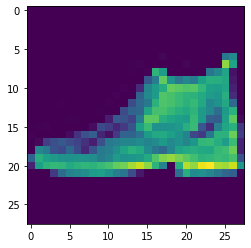

In [55]:
img=x_training[50,:].reshape((28,28))
plt.imshow(img)
plt.show()

# Creating the Neral Function

In [56]:
img_rows=28
img_cols=28
batch_size=512

img_shape=(img_rows, img_cols,1)
x_training=x_training.reshape(x_training.shape[0],*img_shape)
x_testing=x_testing.reshape(x_testing.shape[0],*img_shape)
x_validate=x_validate.reshape(x_validate.shape[0],*img_shape)

In [57]:
import tensorflow
from tensorflow import estimator
ann_model=Sequential([
    Conv2D(filters=33, kernel_size=3, activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])



In [65]:



ann_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

ValueError: Could not interpret optimizer identifier: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000023788AF4848>

In [63]:
ann_model.fit(
x_training, y_training, batch_size=batch_size,
epochs=10, verbose=1,
validation_data=(x_validate, y_validate),
)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [64]:
acc_score=ann_model.evaluate(x_testing, y_testing, verbose=0)
print('test accurancy: {:.4f}'.format(score[0]))
print('test loss: {:.4f}'.format(score[1]))

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.